**Customer Travel Satisfaction -- Big Data Project**

Extracting the Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load the dataset
travel_pro = pd.read_csv('Train.csv')

# Convert date columns to datetime (keep original columns)
travel_pro['Departure Date'] = pd.to_datetime(travel_pro['Departure Date'], dayfirst=True)
travel_pro['Return Date'] = pd.to_datetime(travel_pro['Return Date'], dayfirst=True)

# Define seasons by months
season_months = {
    'Winter': [12, 1, 2],
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Autumn': [9, 10, 11]
}

# Function to check if any date in the trip overlaps with season months
def overlaps_season(start_date, end_date, season_mths):
    # Generate all months between start and end
    trip_range = pd.date_range(start=start_date, end=end_date)
    trip_months = trip_range.month
    return int(any(month in season_mths for month in trip_months))

# Create seasonal columns
for season, months in season_months.items():
    travel_pro[season] = travel_pro.apply(
        lambda row: overlaps_season(row['Departure Date'], row['Return Date'], months),
        axis=1
    )

# Preview the result
travel_pro.head(20)

,Trip ID,User ID,Destination,Departure Date,Return Date,Travel Type,Transportation Mode,Hotel Rating,Total Cost ($),Customer_Satisfaction,Winter,Spring,Summer,Autumn
0,TRIP001,USER6303,Sydney,2024-07-28,2024-09-14,Cultural,Bus,4,2297.38,1,0,0,1,1
1,TRIP002,USER1398,Tokyo,2025-01-04,2025-02-20,Leisure,Flight,3,4171.03,1,1,0,0,0
2,TRIP003,USER8452,New York,2024-09-14,2025-03-06,Business,Cruise,4,695.11,3,1,1,0,1
3,TRIP004,USER5289,Sydney,2024-07-06,2024-08-14,Adventure,Flight,2,1371.81,3,0,0,1,0
4,TRIP005,USER9783,New York,2024-08-26,2024-11-25,Cultural,Bus,2,691.52,7,0,0,1,1
5,TRIP006,USER1457,Sydney,2024-04-27,2024-08-11,Beach,Train,2,2651.58,9,0,1,1,0
6,TRIP007,USER4699,Bangkok,2024-04-22,2024-11-09,Family,Train,1,4744.11,10,0,1,1,1
7,TRIP008,USER8584,Paris,2025-02-17,2025-04-10,Beach,Car,1,2926.97,3,1,1,0,0
8,TRIP009,USER5911,Dubai,2024-12-28,2025-02-03,Adventure,Train,3,2872.18,1,1,0,0,0
9,TRIP010,USER4150,Paris,2025-02-01,2025-02-23,Business,Flight,2,3524.44,4,1,0,0,0


In [3]:
# added one-hot encoding for season combinations
def season_combinations(season_row):
    season_combos = [season.lower() for season in season_months if season_row[season]==1]
    return '-'.join(sorted(season_combos))

travel_pro['season_combination'] = travel_pro.apply(season_combinations, axis=1)

season_combination_dummies = pd.get_dummies(travel_pro['season_combination'], prefix='sc').astype(int)
travel_pro_2 = pd.concat([travel_pro, season_combination_dummies], axis=1)

travel_pro_2.head(10)

,Trip ID,User ID,Destination,Departure Date,Return Date,Travel Type,Transportation Mode,Hotel Rating,Total Cost ($),Customer_Satisfaction,...,sc_autumn-spring-summer-winter,sc_autumn-spring-winter,sc_autumn-summer,sc_autumn-summer-winter,sc_autumn-winter,sc_spring,sc_spring-summer,sc_spring-winter,sc_summer,sc_winter
0,TRIP001,USER6303,Sydney,2024-07-28,2024-09-14,Cultural,Bus,4,2297.38,1,...,0,0,1,0,0,0,0,0,0,0
1,TRIP002,USER1398,Tokyo,2025-01-04,2025-02-20,Leisure,Flight,3,4171.03,1,...,0,0,0,0,0,0,0,0,0,1
2,TRIP003,USER8452,New York,2024-09-14,2025-03-06,Business,Cruise,4,695.11,3,...,0,1,0,0,0,0,0,0,0,0
3,TRIP004,USER5289,Sydney,2024-07-06,2024-08-14,Adventure,Flight,2,1371.81,3,...,0,0,0,0,0,0,0,0,1,0
4,TRIP005,USER9783,New York,2024-08-26,2024-11-25,Cultural,Bus,2,691.52,7,...,0,0,1,0,0,0,0,0,0,0
5,TRIP006,USER1457,Sydney,2024-04-27,2024-08-11,Beach,Train,2,2651.58,9,...,0,0,0,0,0,0,1,0,0,0
6,TRIP007,USER4699,Bangkok,2024-04-22,2024-11-09,Family,Train,1,4744.11,10,...,0,0,0,0,0,0,0,0,0,0
7,TRIP008,USER8584,Paris,2025-02-17,2025-04-10,Beach,Car,1,2926.97,3,...,0,0,0,0,0,0,0,1,0,0
8,TRIP009,USER5911,Dubai,2024-12-28,2025-02-03,Adventure,Train,3,2872.18,1,...,0,0,0,0,0,0,0,0,0,1
9,TRIP010,USER4150,Paris,2025-02-01,2025-02-23,Business,Flight,2,3524.44,4,...,0,0,0,0,0,0,0,0,0,1


In [4]:
#  added a new col saying the customer is satisfied or not satisfied (1-5, 6-10) 
def customer_sat_summary(row):

    if row["Customer_Satisfaction"] < 6:
        return 0
    else:
        return 1

travel_pro_2['cust_sat_summary'] = travel_pro_2.apply(customer_sat_summary, axis=1)

travel_pro_2.head(10)

,Trip ID,User ID,Destination,Departure Date,Return Date,Travel Type,Transportation Mode,Hotel Rating,Total Cost ($),Customer_Satisfaction,...,sc_autumn-spring-winter,sc_autumn-summer,sc_autumn-summer-winter,sc_autumn-winter,sc_spring,sc_spring-summer,sc_spring-winter,sc_summer,sc_winter,cust_sat_summary
0,TRIP001,USER6303,Sydney,2024-07-28,2024-09-14,Cultural,Bus,4,2297.38,1,...,0,1,0,0,0,0,0,0,0,0
1,TRIP002,USER1398,Tokyo,2025-01-04,2025-02-20,Leisure,Flight,3,4171.03,1,...,0,0,0,0,0,0,0,0,1,0
2,TRIP003,USER8452,New York,2024-09-14,2025-03-06,Business,Cruise,4,695.11,3,...,1,0,0,0,0,0,0,0,0,0
3,TRIP004,USER5289,Sydney,2024-07-06,2024-08-14,Adventure,Flight,2,1371.81,3,...,0,0,0,0,0,0,0,1,0,0
4,TRIP005,USER9783,New York,2024-08-26,2024-11-25,Cultural,Bus,2,691.52,7,...,0,1,0,0,0,0,0,0,0,1
5,TRIP006,USER1457,Sydney,2024-04-27,2024-08-11,Beach,Train,2,2651.58,9,...,0,0,0,0,0,1,0,0,0,1
6,TRIP007,USER4699,Bangkok,2024-04-22,2024-11-09,Family,Train,1,4744.11,10,...,0,0,0,0,0,0,0,0,0,1
7,TRIP008,USER8584,Paris,2025-02-17,2025-04-10,Beach,Car,1,2926.97,3,...,0,0,0,0,0,0,1,0,0,0
8,TRIP009,USER5911,Dubai,2024-12-28,2025-02-03,Adventure,Train,3,2872.18,1,...,0,0,0,0,0,0,0,0,1,0
9,TRIP010,USER4150,Paris,2025-02-01,2025-02-23,Business,Flight,2,3524.44,4,...,0,0,0,0,0,0,0,0,1,0


In [5]:
# One-hot encoding for travel type
travel_type_dummies = pd.get_dummies(travel_pro_2['Travel Type'], prefix='travel_type').astype(int)
travel_pro_2 = pd.concat([travel_pro_2, travel_type_dummies], axis=1)

travel_pro_2.head(10)

,Trip ID,User ID,Destination,Departure Date,Return Date,Travel Type,Transportation Mode,Hotel Rating,Total Cost ($),Customer_Satisfaction,...,sc_spring-winter,sc_summer,sc_winter,cust_sat_summary,travel_type_Adventure,travel_type_Beach,travel_type_Business,travel_type_Cultural,travel_type_Family,travel_type_Leisure
0,TRIP001,USER6303,Sydney,2024-07-28,2024-09-14,Cultural,Bus,4,2297.38,1,...,0,0,0,0,0,0,0,1,0,0
1,TRIP002,USER1398,Tokyo,2025-01-04,2025-02-20,Leisure,Flight,3,4171.03,1,...,0,0,1,0,0,0,0,0,0,1
2,TRIP003,USER8452,New York,2024-09-14,2025-03-06,Business,Cruise,4,695.11,3,...,0,0,0,0,0,0,1,0,0,0
3,TRIP004,USER5289,Sydney,2024-07-06,2024-08-14,Adventure,Flight,2,1371.81,3,...,0,1,0,0,1,0,0,0,0,0
4,TRIP005,USER9783,New York,2024-08-26,2024-11-25,Cultural,Bus,2,691.52,7,...,0,0,0,1,0,0,0,1,0,0
5,TRIP006,USER1457,Sydney,2024-04-27,2024-08-11,Beach,Train,2,2651.58,9,...,0,0,0,1,0,1,0,0,0,0
6,TRIP007,USER4699,Bangkok,2024-04-22,2024-11-09,Family,Train,1,4744.11,10,...,0,0,0,1,0,0,0,0,1,0
7,TRIP008,USER8584,Paris,2025-02-17,2025-04-10,Beach,Car,1,2926.97,3,...,1,0,0,0,0,1,0,0,0,0
8,TRIP009,USER5911,Dubai,2024-12-28,2025-02-03,Adventure,Train,3,2872.18,1,...,0,0,1,0,1,0,0,0,0,0
9,TRIP010,USER4150,Paris,2025-02-01,2025-02-23,Business,Flight,2,3524.44,4,...,0,0,1,0,0,0,1,0,0,0


In [6]:
# Calculate travel duration in days
travel_pro_2['Travel Duration (Days)'] = (travel_pro_2['Return Date'] - travel_pro_2['Departure Date']).dt.days

# Preview the updated dataframe
travel_pro_2.head(10)

,Trip ID,User ID,Destination,Departure Date,Return Date,Travel Type,Transportation Mode,Hotel Rating,Total Cost ($),Customer_Satisfaction,...,sc_summer,sc_winter,cust_sat_summary,travel_type_Adventure,travel_type_Beach,travel_type_Business,travel_type_Cultural,travel_type_Family,travel_type_Leisure,Travel Duration (Days)
0,TRIP001,USER6303,Sydney,2024-07-28,2024-09-14,Cultural,Bus,4,2297.38,1,...,0,0,0,0,0,0,1,0,0,48
1,TRIP002,USER1398,Tokyo,2025-01-04,2025-02-20,Leisure,Flight,3,4171.03,1,...,0,1,0,0,0,0,0,0,1,47
2,TRIP003,USER8452,New York,2024-09-14,2025-03-06,Business,Cruise,4,695.11,3,...,0,0,0,0,0,1,0,0,0,173
3,TRIP004,USER5289,Sydney,2024-07-06,2024-08-14,Adventure,Flight,2,1371.81,3,...,1,0,0,1,0,0,0,0,0,39
4,TRIP005,USER9783,New York,2024-08-26,2024-11-25,Cultural,Bus,2,691.52,7,...,0,0,1,0,0,0,1,0,0,91
5,TRIP006,USER1457,Sydney,2024-04-27,2024-08-11,Beach,Train,2,2651.58,9,...,0,0,1,0,1,0,0,0,0,106
6,TRIP007,USER4699,Bangkok,2024-04-22,2024-11-09,Family,Train,1,4744.11,10,...,0,0,1,0,0,0,0,1,0,201
7,TRIP008,USER8584,Paris,2025-02-17,2025-04-10,Beach,Car,1,2926.97,3,...,0,0,0,0,1,0,0,0,0,52
8,TRIP009,USER5911,Dubai,2024-12-28,2025-02-03,Adventure,Train,3,2872.18,1,...,0,1,0,1,0,0,0,0,0,37
9,TRIP010,USER4150,Paris,2025-02-01,2025-02-23,Business,Flight,2,3524.44,4,...,0,1,0,0,0,1,0,0,0,22


In [7]:
destination_dummies = pd.get_dummies(travel_pro_2['Destination'], prefix='destination').astype(int)
travel_pro_2 = pd.concat([travel_pro_2, destination_dummies], axis=1)

travel_pro_2.head(10)

,Trip ID,User ID,Destination,Departure Date,Return Date,Travel Type,Transportation Mode,Hotel Rating,Total Cost ($),Customer_Satisfaction,...,destination_Bangkok,destination_Barcelona,destination_Dubai,destination_Istanbul,destination_London,destination_New York,destination_Paris,destination_Rome,destination_Sydney,destination_Tokyo
0,TRIP001,USER6303,Sydney,2024-07-28,2024-09-14,Cultural,Bus,4,2297.38,1,...,0,0,0,0,0,0,0,0,1,0
1,TRIP002,USER1398,Tokyo,2025-01-04,2025-02-20,Leisure,Flight,3,4171.03,1,...,0,0,0,0,0,0,0,0,0,1
2,TRIP003,USER8452,New York,2024-09-14,2025-03-06,Business,Cruise,4,695.11,3,...,0,0,0,0,0,1,0,0,0,0
3,TRIP004,USER5289,Sydney,2024-07-06,2024-08-14,Adventure,Flight,2,1371.81,3,...,0,0,0,0,0,0,0,0,1,0
4,TRIP005,USER9783,New York,2024-08-26,2024-11-25,Cultural,Bus,2,691.52,7,...,0,0,0,0,0,1,0,0,0,0
5,TRIP006,USER1457,Sydney,2024-04-27,2024-08-11,Beach,Train,2,2651.58,9,...,0,0,0,0,0,0,0,0,1,0
6,TRIP007,USER4699,Bangkok,2024-04-22,2024-11-09,Family,Train,1,4744.11,10,...,1,0,0,0,0,0,0,0,0,0
7,TRIP008,USER8584,Paris,2025-02-17,2025-04-10,Beach,Car,1,2926.97,3,...,0,0,0,0,0,0,1,0,0,0
8,TRIP009,USER5911,Dubai,2024-12-28,2025-02-03,Adventure,Train,3,2872.18,1,...,0,0,1,0,0,0,0,0,0,0
9,TRIP010,USER4150,Paris,2025-02-01,2025-02-23,Business,Flight,2,3524.44,4,...,0,0,0,0,0,0,1,0,0,0


In [8]:
transportation_dummies = pd.get_dummies(travel_pro_2['Transportation Mode'], prefix='transportation_mode').astype(int)
travel_pro_2 = pd.concat([travel_pro_2, transportation_dummies], axis=1)

travel_pro_2.head(10)

,Trip ID,User ID,Destination,Departure Date,Return Date,Travel Type,Transportation Mode,Hotel Rating,Total Cost ($),Customer_Satisfaction,...,destination_New York,destination_Paris,destination_Rome,destination_Sydney,destination_Tokyo,transportation_mode_Bus,transportation_mode_Car,transportation_mode_Cruise,transportation_mode_Flight,transportation_mode_Train
0,TRIP001,USER6303,Sydney,2024-07-28,2024-09-14,Cultural,Bus,4,2297.38,1,...,0,0,0,1,0,1,0,0,0,0
1,TRIP002,USER1398,Tokyo,2025-01-04,2025-02-20,Leisure,Flight,3,4171.03,1,...,0,0,0,0,1,0,0,0,1,0
2,TRIP003,USER8452,New York,2024-09-14,2025-03-06,Business,Cruise,4,695.11,3,...,1,0,0,0,0,0,0,1,0,0
3,TRIP004,USER5289,Sydney,2024-07-06,2024-08-14,Adventure,Flight,2,1371.81,3,...,0,0,0,1,0,0,0,0,1,0
4,TRIP005,USER9783,New York,2024-08-26,2024-11-25,Cultural,Bus,2,691.52,7,...,1,0,0,0,0,1,0,0,0,0
5,TRIP006,USER1457,Sydney,2024-04-27,2024-08-11,Beach,Train,2,2651.58,9,...,0,0,0,1,0,0,0,0,0,1
6,TRIP007,USER4699,Bangkok,2024-04-22,2024-11-09,Family,Train,1,4744.11,10,...,0,0,0,0,0,0,0,0,0,1
7,TRIP008,USER8584,Paris,2025-02-17,2025-04-10,Beach,Car,1,2926.97,3,...,0,1,0,0,0,0,1,0,0,0
8,TRIP009,USER5911,Dubai,2024-12-28,2025-02-03,Adventure,Train,3,2872.18,1,...,0,0,0,0,0,0,0,0,0,1
9,TRIP010,USER4150,Paris,2025-02-01,2025-02-23,Business,Flight,2,3524.44,4,...,0,1,0,0,0,0,0,0,1,0


In [9]:
travel_pro_2.columns

Index(['Trip ID', 'User ID', 'Destination', 'Departure Date', 'Return Date',
       'Travel Type', 'Transportation Mode', 'Hotel Rating', 'Total Cost ($)',
       'Customer_Satisfaction', 'Winter', 'Spring', 'Summer', 'Autumn',
       'season_combination', 'sc_autumn', 'sc_autumn-spring-summer',
       'sc_autumn-spring-summer-winter', 'sc_autumn-spring-winter',
       'sc_autumn-summer', 'sc_autumn-summer-winter', 'sc_autumn-winter',
       'sc_spring', 'sc_spring-summer', 'sc_spring-winter', 'sc_summer',
       'sc_winter', 'cust_sat_summary', 'travel_type_Adventure',
       'travel_type_Beach', 'travel_type_Business', 'travel_type_Cultural',
       'travel_type_Family', 'travel_type_Leisure', 'Travel Duration (Days)',
       'destination_Bangkok', 'destination_Barcelona', 'destination_Dubai',
       'destination_Istanbul', 'destination_London', 'destination_New York',
       'destination_Paris', 'destination_Rome', 'destination_Sydney',
       'destination_Tokyo', 'transportation_mo

In [10]:
#Statistics
departure_years = travel_pro_2['Departure Date'].dt.year.unique()
return_years = travel_pro_2['Return Date'].dt.year.unique()

print("Unique Departure Years:", departure_years)
print("Unique Return Years:", return_years)

dep2024 = travel_pro_2['Departure Date'].dt.year.value_counts().get(2024, 0)
dep2025 = travel_pro_2['Departure Date'].dt.year.value_counts().get(2025, 0)

print("Departure in 2024:", dep2024)
print("Departure in 2025:", dep2025)

arr2024 = travel_pro_2['Return Date'].dt.year.value_counts().get(2024, 0)
arr2025 = travel_pro_2['Return Date'].dt.year.value_counts().get(2025, 0)

print("Return in 2024:", arr2024)
print("Return in 2025:", arr2025)

print("Total number of records:", len(travel_pro_2))

Unique Departure Years: [2024 2025]
Unique Return Years: [2024 2025]
Departure in 2024: 15729
Departure in 2025: 4071
Return in 2024: 8259
Return in 2025: 11541
Total number of records: 19800


## Comparing Trip Counts for Two 12-Month Period Options
#
#### Goal: Find which 12-month period captures the most trips, considering trips where EITHER the departure OR return date
#### falls within the period.
#
### Option 1: March 1, 2024 – February 28, 2025
### Option 2: April 1, 2024 – March 31, 2025
#
##### We count the number of trips matching each option and compare.

In [11]:
# Option 1 Setup
start_date1 = pd.to_datetime('2024-03-01')
end_date1 = pd.to_datetime('2025-02-28')

option1_trips = travel_pro[
    (travel_pro['Departure Date'].between(start_date1, end_date1)) |
    (travel_pro['Return Date'].between(start_date1, end_date1))
]

# Option 2 Setup
start_date2 = pd.to_datetime('2024-04-01')
end_date2 = pd.to_datetime('2025-03-31')

option2_trips = travel_pro[
    (travel_pro['Departure Date'].between(start_date2, end_date2)) |
    (travel_pro['Return Date'].between(start_date2, end_date2))
]

# Comparison
print("Trip Counts for Each Option")
print(f"Option 1 (March 2024 – Feb 2025): {len(option1_trips)} trips")
print(f"Option 2 (April 2024 – March 2025): {len(option2_trips)} trips")

Trip Counts for Each Option
Option 1 (March 2024 – Feb 2025): 18911 trips
Option 2 (April 2024 – March 2025): 19747 trips


In [12]:
travel_pro_3 = travel_pro_2[
    (travel_pro_2['Departure Date'].between(start_date2, end_date2)) |
    (travel_pro_2['Return Date'].between(start_date2, end_date2))
]

travel_pro_3.head(10)

,Trip ID,User ID,Destination,Departure Date,Return Date,Travel Type,Transportation Mode,Hotel Rating,Total Cost ($),Customer_Satisfaction,...,destination_New York,destination_Paris,destination_Rome,destination_Sydney,destination_Tokyo,transportation_mode_Bus,transportation_mode_Car,transportation_mode_Cruise,transportation_mode_Flight,transportation_mode_Train
0,TRIP001,USER6303,Sydney,2024-07-28,2024-09-14,Cultural,Bus,4,2297.38,1,...,0,0,0,1,0,1,0,0,0,0
1,TRIP002,USER1398,Tokyo,2025-01-04,2025-02-20,Leisure,Flight,3,4171.03,1,...,0,0,0,0,1,0,0,0,1,0
2,TRIP003,USER8452,New York,2024-09-14,2025-03-06,Business,Cruise,4,695.11,3,...,1,0,0,0,0,0,0,1,0,0
3,TRIP004,USER5289,Sydney,2024-07-06,2024-08-14,Adventure,Flight,2,1371.81,3,...,0,0,0,1,0,0,0,0,1,0
4,TRIP005,USER9783,New York,2024-08-26,2024-11-25,Cultural,Bus,2,691.52,7,...,1,0,0,0,0,1,0,0,0,0
5,TRIP006,USER1457,Sydney,2024-04-27,2024-08-11,Beach,Train,2,2651.58,9,...,0,0,0,1,0,0,0,0,0,1
6,TRIP007,USER4699,Bangkok,2024-04-22,2024-11-09,Family,Train,1,4744.11,10,...,0,0,0,0,0,0,0,0,0,1
7,TRIP008,USER8584,Paris,2025-02-17,2025-04-10,Beach,Car,1,2926.97,3,...,0,1,0,0,0,0,1,0,0,0
8,TRIP009,USER5911,Dubai,2024-12-28,2025-02-03,Adventure,Train,3,2872.18,1,...,0,0,0,0,0,0,0,0,0,1
9,TRIP010,USER4150,Paris,2025-02-01,2025-02-23,Business,Flight,2,3524.44,4,...,0,1,0,0,0,0,0,0,1,0


## Final preparations for the dataset that we will train

In [13]:
feature_cols = (
    ['Travel Duration (Days)'] +
    [col for col in travel_pro_3.columns if col.startswith('sc_')] +
    [col for col in travel_pro_3.columns if col.startswith('travel_type_')] +
    [col for col in travel_pro_3.columns if col.startswith('destination_')] +
    [col for col in travel_pro_3.columns if col.startswith('transportation_mode_')]
)

print(feature_cols)
print(travel_pro_3.shape)

# Final input x and target y
X = travel_pro_3[feature_cols]
y = travel_pro_3['cust_sat_summary']

print(X.head())
print(y.head())


['Travel Duration (Days)', 'sc_autumn', 'sc_autumn-spring-summer', 'sc_autumn-spring-summer-winter', 'sc_autumn-spring-winter', 'sc_autumn-summer', 'sc_autumn-summer-winter', 'sc_autumn-winter', 'sc_spring', 'sc_spring-summer', 'sc_spring-winter', 'sc_summer', 'sc_winter', 'travel_type_Adventure', 'travel_type_Beach', 'travel_type_Business', 'travel_type_Cultural', 'travel_type_Family', 'travel_type_Leisure', 'destination_Bangkok', 'destination_Barcelona', 'destination_Dubai', 'destination_Istanbul', 'destination_London', 'destination_New York', 'destination_Paris', 'destination_Rome', 'destination_Sydney', 'destination_Tokyo', 'transportation_mode_Bus', 'transportation_mode_Car', 'transportation_mode_Cruise', 'transportation_mode_Flight', 'transportation_mode_Train']
(19747, 50)
   Travel Duration (Days)  sc_autumn  sc_autumn-spring-summer  \
0                      48          0                        0   
1                      47          0                        0   
2             

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

ModuleNotFoundError: No module named 'sklearn'

## Logistic Regression

In [ ]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_val)

# Evaluation
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.4941772151898734
              precision    recall  f1-score   support

           0       0.50      0.48      0.49      2012
           1       0.49      0.51      0.50      1938

    accuracy                           0.49      3950
   macro avg       0.49      0.49      0.49      3950
weighted avg       0.49      0.49      0.49      3950



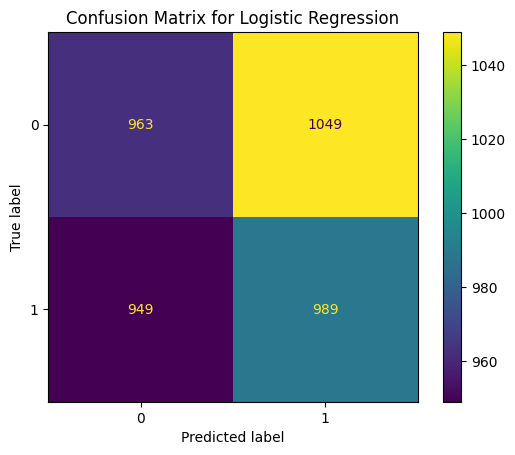

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_val, y_val)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

## Random Forest

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model_rf = RandomForestClassifier(random_state=42, class_weight='balanced')
model_rf.fit(X_train, y_train)

# Predict
y_pred_rf = model_rf.predict(X_val)

# Evaluation
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.4941772151898734
              precision    recall  f1-score   support

           0       0.50      0.48      0.49      2012
           1       0.49      0.51      0.50      1938

    accuracy                           0.49      3950
   macro avg       0.49      0.49      0.49      3950
weighted avg       0.49      0.49      0.49      3950



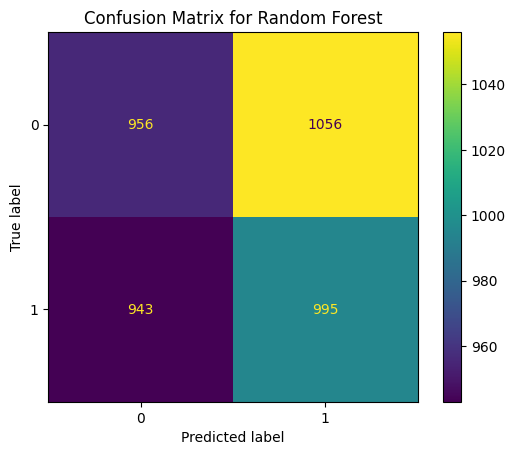

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model_rf, X_val, y_val)
plt.title("Confusion Matrix for Random Forest")
plt.show()

## Plots of the training data

/var/folders/gr/28yk7w6116xf5n5pv51ys9600000gn/T/ipykernel_29015/845987406.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('YlOrRd')  # Yellow to Red colormap


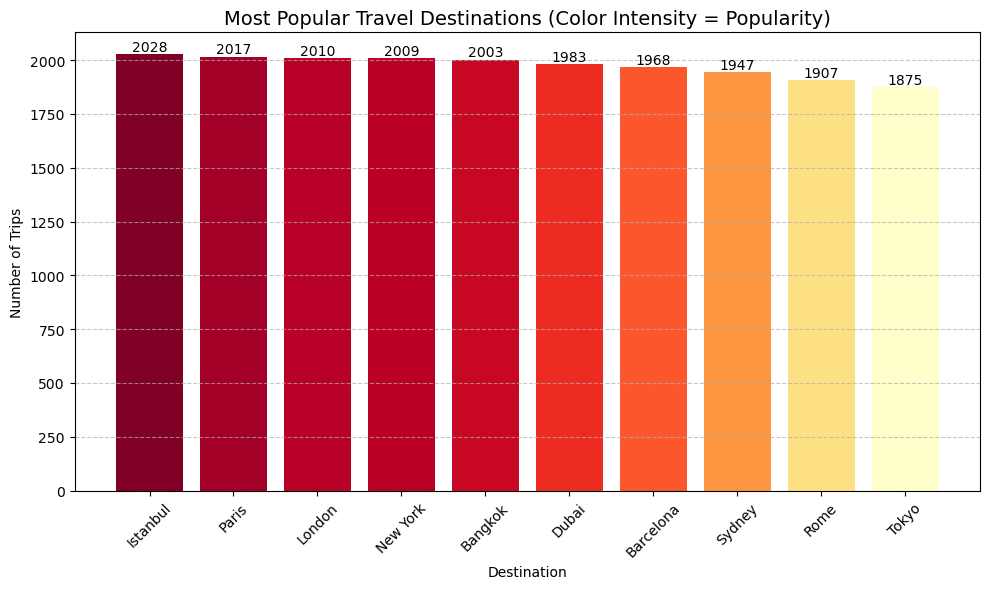

In [33]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns


# Count number of trips per destination
destination_counts = travel_pro_3['Destination'].value_counts()

# Normalize the counts for color mapping
norm = colors.Normalize(vmin=destination_counts.min(), vmax=destination_counts.max())
cmap = cm.get_cmap('YlOrRd')  # Yellow to Red colormap

# Generate colors for each bar
bar_colors = [cmap(norm(value)) for value in destination_counts]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(destination_counts.index, destination_counts.values, color=bar_colors)
plt.title('Most Popular Travel Destinations (Color Intensity = Popularity)', fontsize=14)
plt.xlabel('Destination')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Optional: Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, int(yval), ha='center', va='bottom')

plt.show()


Trip count per season:
 Winter    12621
Autumn    11750
Spring     9759
Summer     8643
dtype: int64


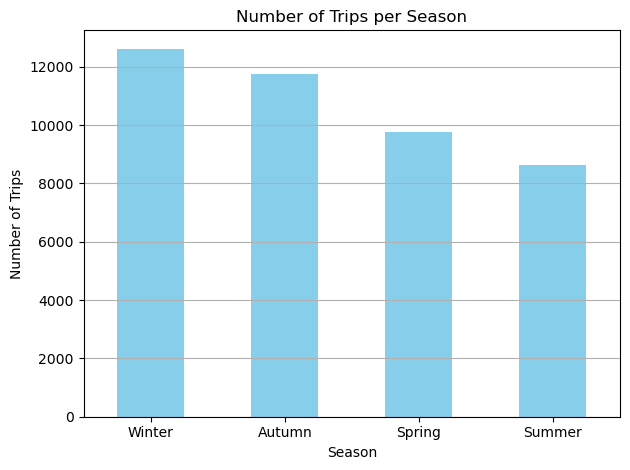

In [ ]:
# Sum each season column to count number of trips per season
season_counts = travel_pro_3[['Winter', 'Spring', 'Summer', 'Autumn']].sum()

# Sort to see which season is most popular
season_counts = season_counts.sort_values(ascending=False)
print("Trip count per season:\n", season_counts)

# plot
season_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Trips per Season')
plt.ylabel('Number of Trips')
plt.xlabel('Season')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


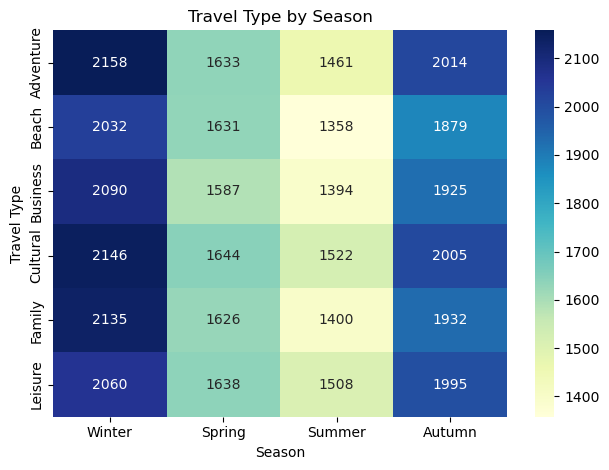

In [ ]:
season_cols = ['Winter', 'Spring', 'Summer', 'Autumn']
heatmap_data = travel_pro_3.groupby('Travel Type')[season_cols].sum()

sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Travel Type by Season')
plt.xlabel('Season')
plt.ylabel('Travel Type')
plt.tight_layout()
plt.show()


/var/folders/gr/28yk7w6116xf5n5pv51ys9600000gn/T/ipykernel_10337/660915686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  travel_pro_3['Duration'] = (travel_pro_3['Return Date'] - travel_pro_3['Departure Date']).dt.days


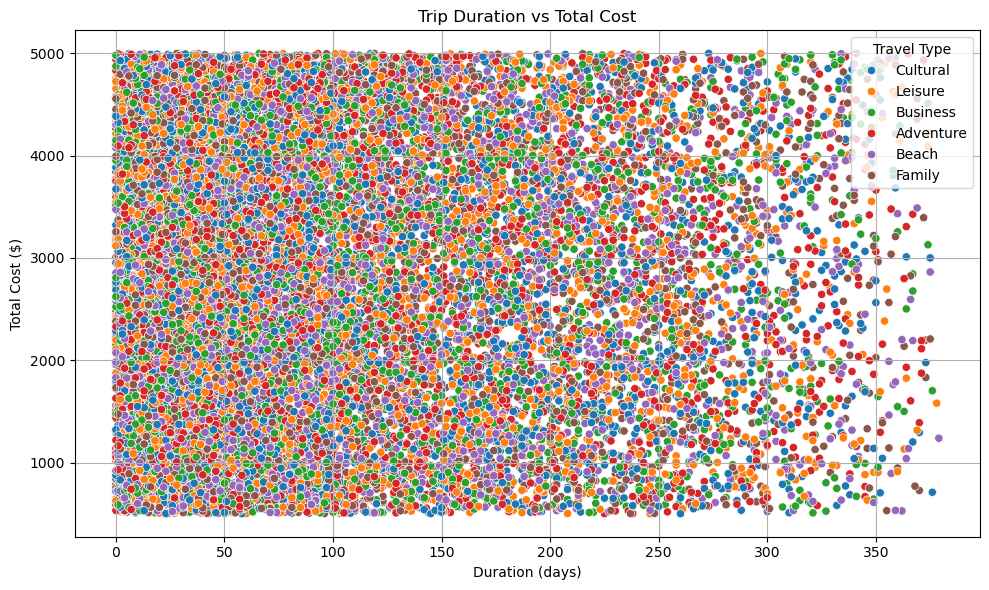

In [ ]:
travel_pro_3['Duration'] = (travel_pro_3['Return Date'] - travel_pro_3['Departure Date']).dt.days

plt.figure(figsize=(10, 6))
sns.scatterplot(data=travel_pro_3, x='Duration', y='Total Cost ($)', hue='Travel Type', palette='tab10')
plt.title('Trip Duration vs Total Cost')
plt.xlabel('Duration (days)')
plt.ylabel('Total Cost ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/gr/28yk7w6116xf5n5pv51ys9600000gn/T/ipykernel_10337/4138245300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  travel_pro_3['Duration'] = (travel_pro_3['Return Date'] - travel_pro_3['Departure Date']).dt.days


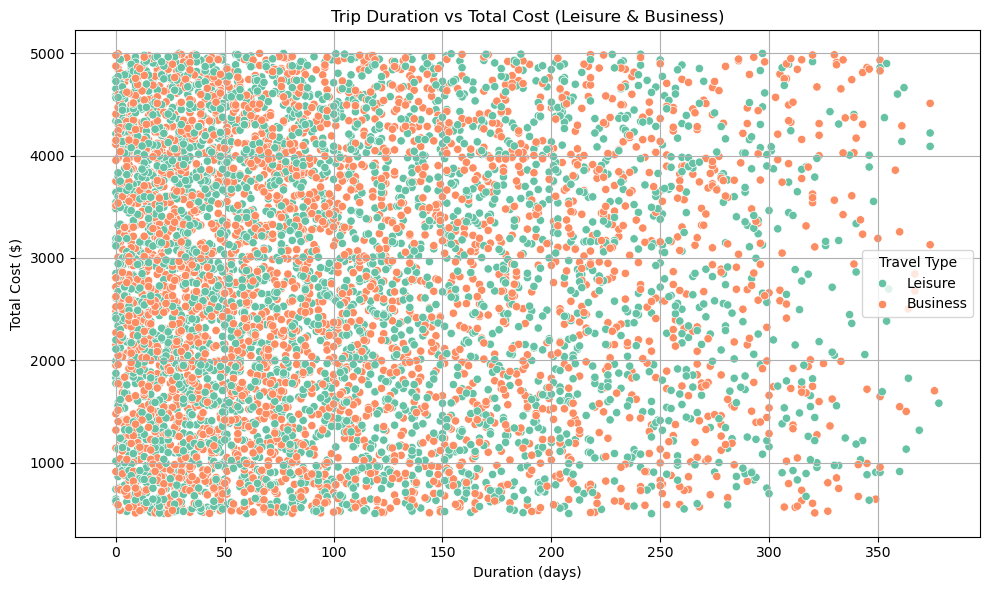

In [ ]:
# Add trip duration in days
travel_pro_3['Duration'] = (travel_pro_3['Return Date'] - travel_pro_3['Departure Date']).dt.days

# Filter only Leisure and Business travel types
filtered_travel = travel_pro_3[travel_pro_3['Travel Type'].isin(['Leisure', 'Business'])]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_travel,
    x='Duration',
    y='Total Cost ($)',
    hue='Travel Type',
    palette='Set2'
)

plt.title('Trip Duration vs Total Cost (Leisure & Business)')
plt.xlabel('Duration (days)')
plt.ylabel('Total Cost ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


Satisfaction by Travel Type:
 Travel Type
Leisure      0.518820
Family       0.509595
Adventure    0.506329
Beach        0.496867
Business     0.494175
Cultural     0.485316
Name: cust_sat_summary, dtype: float64


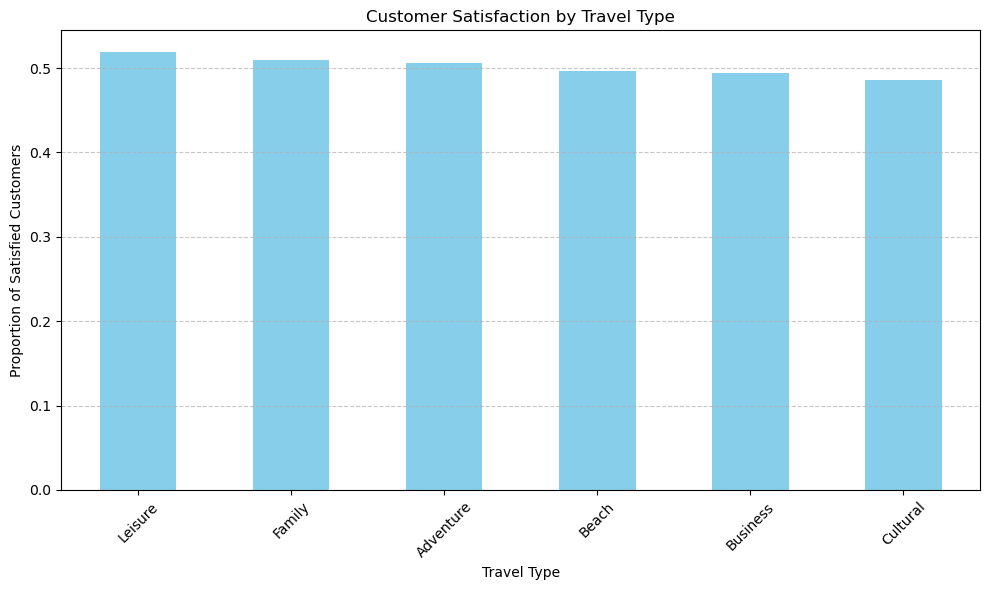

In [15]:
# Group by Travel Type and calculate the proportion of satisfied customers
satisfaction_by_travel_type = travel_pro_3.groupby('Travel Type')['cust_sat_summary'].mean()

# Sort the results for better visualization
satisfaction_by_travel_type = satisfaction_by_travel_type.sort_values(ascending=False)

# Print the results
print("Satisfaction by Travel Type:\n", satisfaction_by_travel_type)

# Plot the results
plt.figure(figsize=(10, 6))
satisfaction_by_travel_type.plot(kind='bar', color='skyblue')
plt.title('Customer Satisfaction by Travel Type')
plt.ylabel('Proportion of Satisfied Customers')
plt.xlabel('Travel Type')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

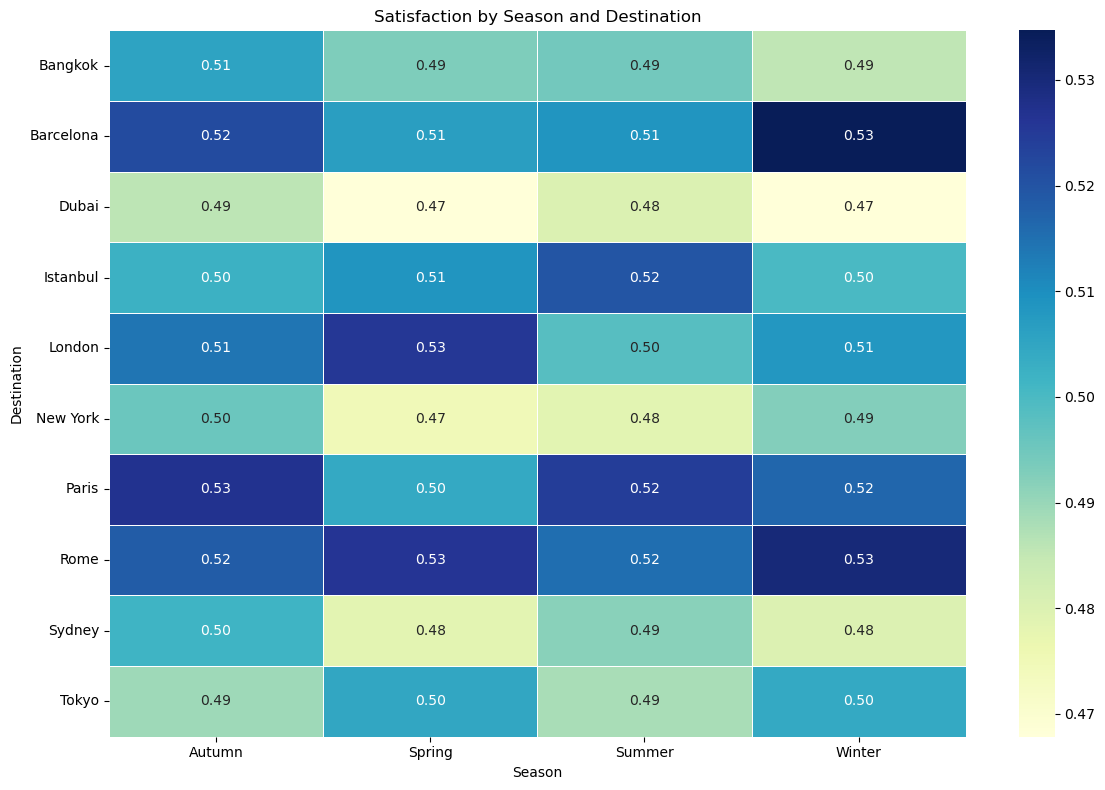

In [ ]:
# calculate average satisfaction for each Destination and Season
season_satisfaction = travel_pro_3.melt(
    id_vars=['Destination', 'cust_sat_summary'], 
    value_vars=['Winter', 'Spring', 'Summer', 'Autumn'], 
    var_name='Season', 
    value_name='IsSeason'
)

# rows where the trip overlaps with the season
season_satisfaction = season_satisfaction[season_satisfaction['IsSeason'] == 1]

# group by Destination and Season, and calculate the average satisfaction
season_satisfaction_avg = season_satisfaction.groupby(['Destination', 'Season'])['cust_sat_summary'].mean().reset_index()

season_satisfaction_pivot = season_satisfaction_avg.pivot(index='Destination', columns='Season', values='cust_sat_summary')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(season_satisfaction_pivot, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Satisfaction by Season and Destination')
plt.xlabel('Season')
plt.ylabel('Destination')
plt.tight_layout()
plt.show()

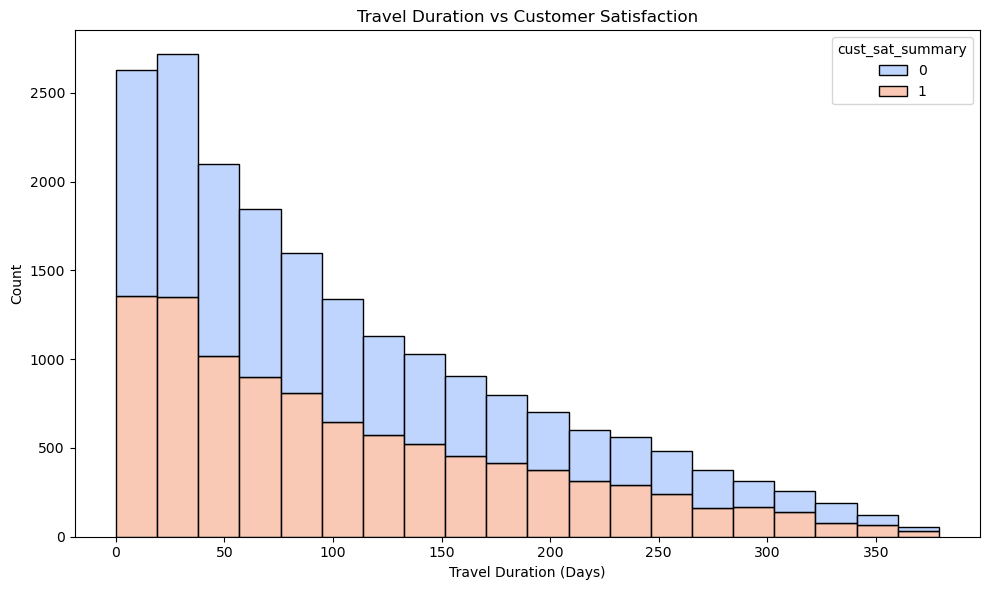

In [ ]:
# In this graph, the x-axis represents Travel Duration (Days), 
# while the color-coded bars (hue) represent Customer Satisfaction: 
# 0 for unsatisfied and 1 for satisfied customers. 
# The height of each bar shows the count of trips for that duration and satisfaction level.
plt.figure(figsize=(10, 6))
sns.histplot(
    data=travel_pro_3,
    x='Travel Duration (Days)',
    hue='cust_sat_summary',
    multiple='stack',
    palette='coolwarm',
    bins=20
)
plt.title('Travel Duration vs Customer Satisfaction')
plt.xlabel('Travel Duration (Days)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

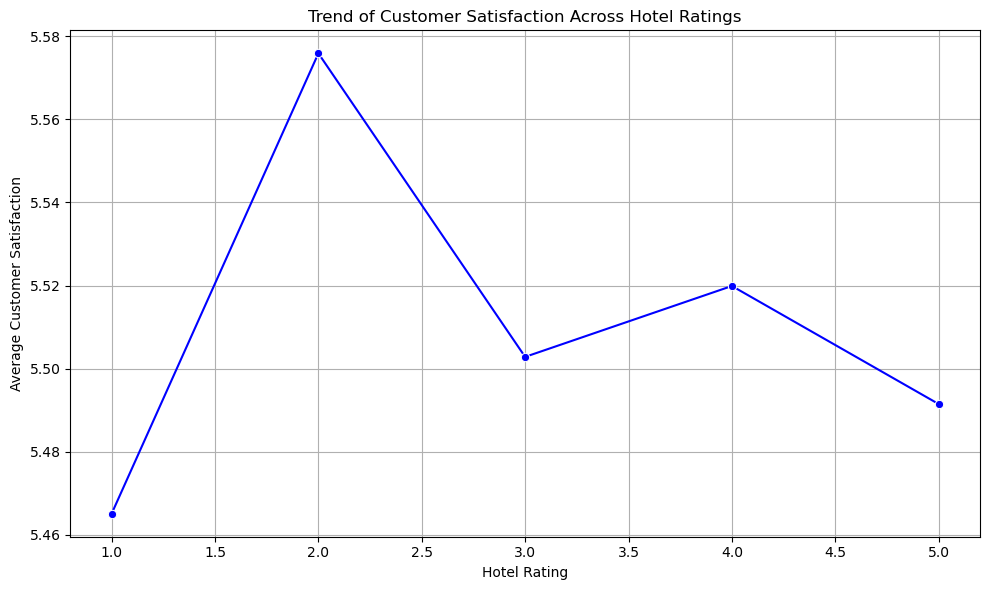

In [ ]:
# group by Hotel Rating and calculate the average satisfaction
avg_satisfaction = travel_pro_3.groupby('Hotel Rating')['Customer_Satisfaction'].mean().reset_index()

# Line plot to show the trend
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=avg_satisfaction,
    x='Hotel Rating',
    y='Customer_Satisfaction',
    marker='o',
    color='blue'
)
plt.title('Trend of Customer Satisfaction Across Hotel Ratings')
plt.xlabel('Hotel Rating')
plt.ylabel('Average Customer Satisfaction')
plt.grid(True)
plt.tight_layout()
plt.show()

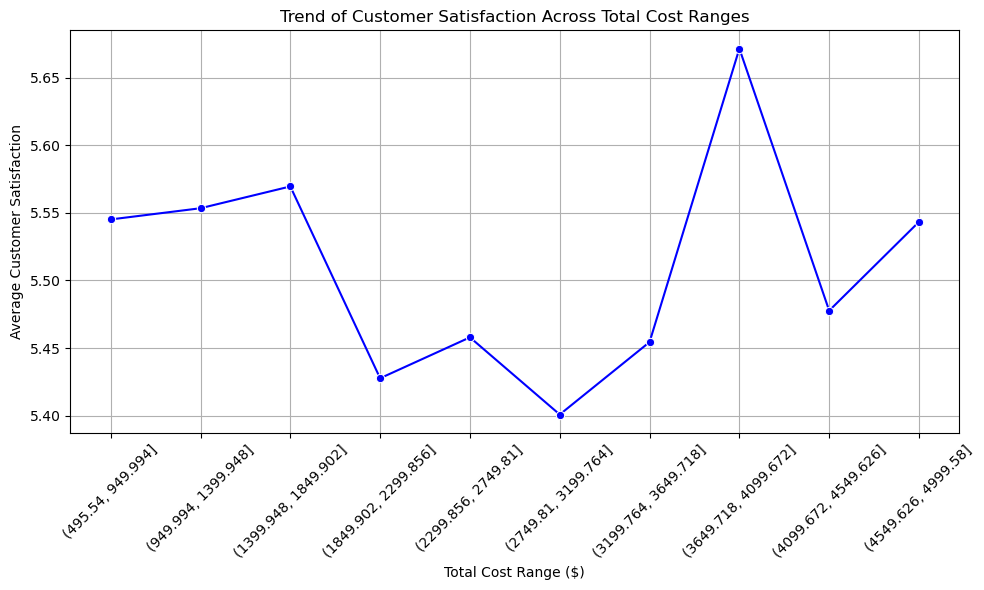

In [35]:
# Convert Cost Range to string for plotting
avg_satisfaction_by_cost['Cost Range'] = avg_satisfaction_by_cost['Cost Range'].astype(str)

# Line plot to show the trend
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=avg_satisfaction_by_cost,
    x='Cost Range',
    y='Customer_Satisfaction',
    marker='o',
    color='blue'
)
plt.title('Trend of Customer Satisfaction Across Total Cost Ranges')
plt.xlabel('Total Cost Range ($)')
plt.ylabel('Average Customer Satisfaction')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/gr/28yk7w6116xf5n5pv51ys9600000gn/T/ipykernel_29015/1660207044.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


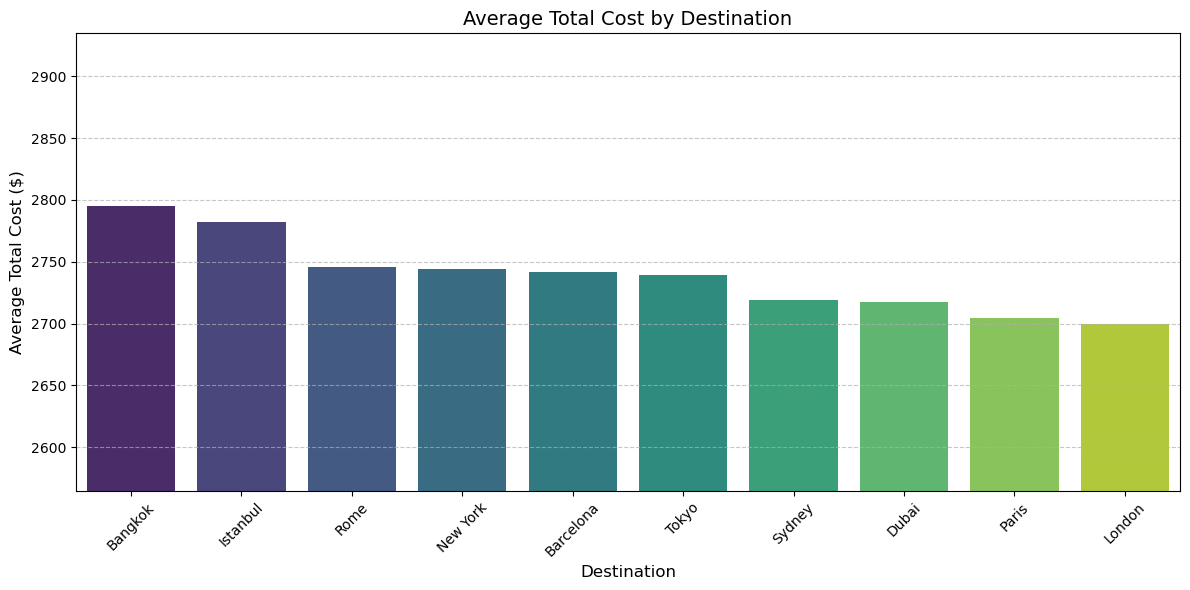

In [38]:
# Adjust the y-axis scale
plt.figure(figsize=(12, 6))
sns.barplot(
    x=avg_cost_by_destination.index,
    y=avg_cost_by_destination.values,
    palette='viridis'
)
plt.title('Average Total Cost by Destination', fontsize=14)
plt.xlabel('Destination', fontsize=12)
plt.ylabel('Average Total Cost ($)', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(avg_cost_by_destination.min() * 0.95, avg_cost_by_destination.max() * 1.05)  # Narrow the y-axis range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/var/folders/gr/28yk7w6116xf5n5pv51ys9600000gn/T/ipykernel_29015/1888038145.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


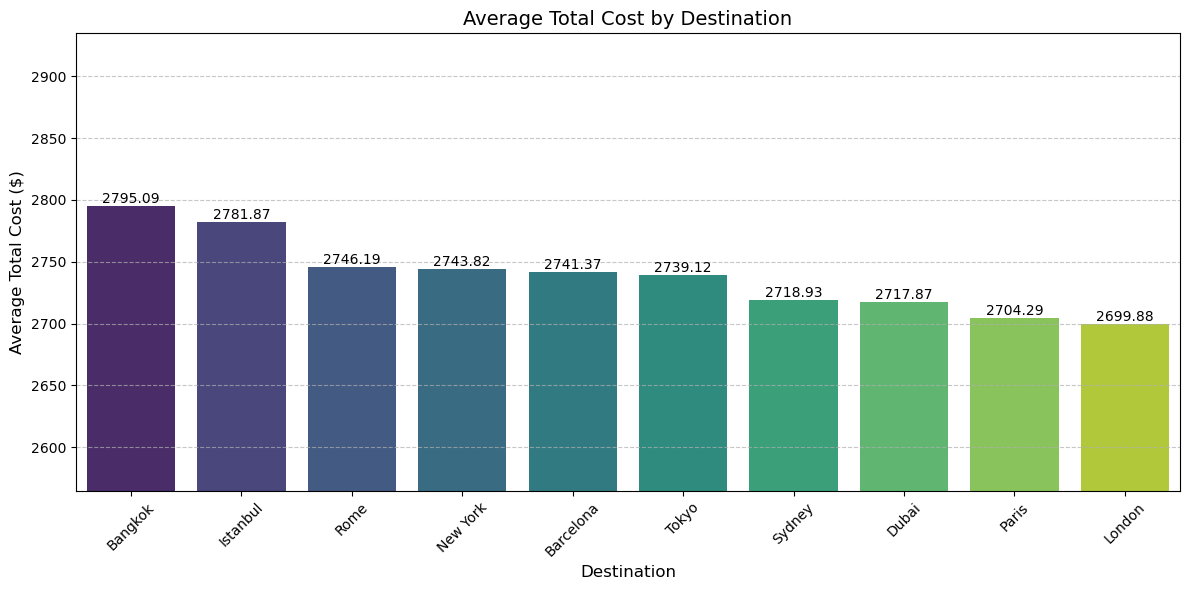

In [ ]:
# Adjust the y-axis scale and add labels
plt.figure(figsize=(12, 6))
bars = sns.barplot(
    x=avg_cost_by_destination.index,
    y=avg_cost_by_destination.values,
    palette='viridis'
)
plt.title('Average Total Cost by Destination', fontsize=14)
plt.xlabel('Destination', fontsize=12)
plt.ylabel('Average Total Cost ($)', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(avg_cost_by_destination.min() * 0.95, avg_cost_by_destination.max() * 1.05)  # Narrow the y-axis range
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of the bars
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(),  
        f'{bar.get_height():.2f}',  
        ha='center',  
        va='bottom', 
        fontsize=10 
    )

plt.tight_layout()
plt.show()

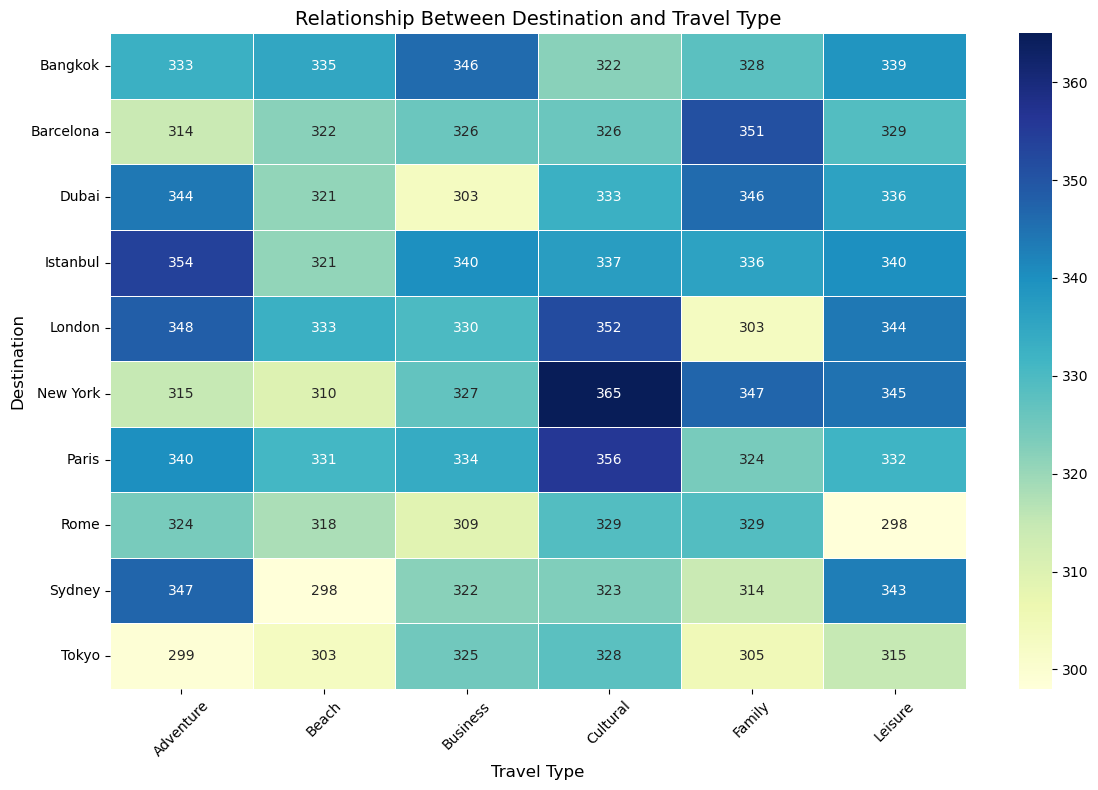

In [ ]:
# Analyze the relationship between destination and travel type
# create a pivot table to count occurrences of each travel type per destination
destination_travel_type = travel_pro_3.pivot_table(
    index='Destination',
    columns='Travel Type',
    values='Trip ID',  # Use 'Trip ID' to count occurrences
    aggfunc='count',
    fill_value=0
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    destination_travel_type,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    linewidths=0.5
)
plt.title('Relationship Between Destination and Travel Type', fontsize=14)
plt.xlabel('Travel Type', fontsize=12)
plt.ylabel('Destination', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()